In [5]:
import sys, os
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from openslide import OpenSlide
from saturation_otsu import get_slice_idx

colors = []
for color_code in mcolors.TABLEAU_COLORS.values():
    colors.append(np.array([int(color_code[1:3], 16), int(color_code[3:5], 16), int(color_code[5:7], 16)]))


ファイル '/workspace/inhouse-vqvae/VQVAE/data/liver_mda/63952.svs' が正常に開かれました。
スライドのプロパティ: <_PropertyMap {'aperio.AppMag': '20', 'aperio.DSR ID': 'ap6101-dsr', 'aperio.Date': '01/19/12', 'aperio.DisplayColor': '0', 'aperio.Exposure Scale': '0.000001', 'aperio.Exposure Time': '109', 'aperio.Filename': '63952', 'aperio.Focus Offset': '-0.000500', 'aperio.ICC Profile': 'ScanScope v1', 'aperio.ImageID': '63952', 'aperio.Left': '25.181852', 'aperio.LineAreaXOffset': '0.008263', 'aperio.LineAreaYOffset': '-0.006754', 'aperio.LineCameraSkew': '0.000000', 'aperio.MPP': '0.4916', 'aperio.OriginalHeight': '35685', 'aperio.OriginalWidth': '54864', 'aperio.ScanScope ID': 'SS1601', 'aperio.StripeWidth': '2032', 'aperio.Time': '06:10:58', 'aperio.Time Zone': 'GMT+09:00', 'aperio.Top': '22.176741', 'aperio.User': 'c1ba2b8e-a01d-4a08-8797-e178732721a6', 'openslide.associated.thumbnail.height': '677', 'openslide.associated.thumbnail.width': '1024', 'openslide.comment': 'Aperio Image Library vFS90 01\r\n548

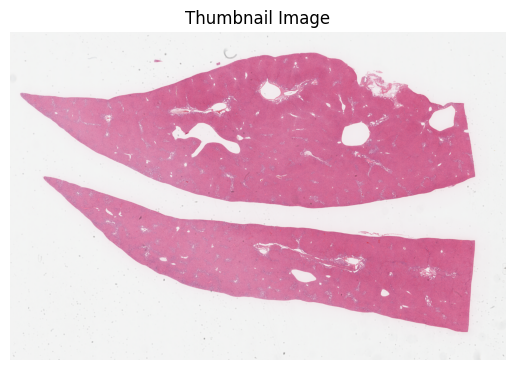

スライドが閉じられました。


In [4]:
import openslide
from openslide import open_slide
import matplotlib.pyplot as plt

# SVSファイルへのパスを指定します
# 例: 'path/to/your/file.svs'
file_path = '/workspace/inhouse-vqvae/VQVAE/data/liver_mda/63952.svs'

# OpenSlideオブジェクトを作成してファイルを開きます
try:
    slide = open_slide(file_path)
    print(f"ファイル '{file_path}' が正常に開かれました。")
    print(f"スライドのプロパティ: {slide.properties}")
    print(f"スライドのレベル数: {slide.level_count}")
    print(f"レベル0のサイズ: {slide.dimensions}")

    # 最も低倍率の画像を読み込み、表示します
    # レベル数は 0 から slide.level_count - 1 までです
    # slide.level_count - 1 が最も低い倍率になります
    thumbnail = slide.read_region((0, 0), slide.level_count - 1, slide.level_dimensions[slide.level_count - 1])

    plt.imshow(thumbnail)
    plt.title("Thumbnail Image")
    plt.axis('off')
    plt.show()

    # スライドを閉じる
    slide.close()
    print("スライドが閉じられました。")

except openslide.OpenSlideError as e:
    print(f"エラー: ファイルを開けませんでした。詳細: {e}")
except FileNotFoundError:
    print(f"エラー: ファイル '{file_path}' が見つかりません。パスを確認してください。")
except Exception as e:
    print(f"予期せぬエラーが発生しました: {e}")